<h2 align=center>Spotify Song Popularity Prediction</h2>



**Team Name: MLDA11**:

**Team Members:**
- Dhruvansh Moyal - 202275395
- Srikar Reddy Adaboina - 202261517
- Kesava Lahari Gollamudi - 202279618
- Vignesh Gopal Gollamudi - 202279917
- Sai Krishna Gunti - 202294219
- Manoj Sai Lankepalle - 202275395


##  Objective: 

Our objective is to create a strong machine learning model that can forecast a song's popularity. As popularity is an integer, the issue will be handled as a regression one. There are 13 more attributes in the dataset that we may use to create our model, ignoring Id and Popularity (referred to as "pop").

### Final Model used:

The final model used by us in this project was a random forest classifier with a max depth of 100 which gave us an root mean square value of 9.18 on training data and 8.25 on testing data. A group of decision trees is called a random forest. This means that a Random Forest is made up of several trees that were built in a certain "random" manner. A separate sample of rows are used to build each tree, and a different sample of characteristics are chosen for splitting at each node. Each tree provides a unique forecast on its own. A single outcome is then produced by averaging these forecasts. A major advantage of random forest is that it cannot extrapolate. It means that the target variable's predicted values never deviate from those in the training set. Also to state tuning the parameter on random forest isn't much difficult and hence it became as an easy choice to choose from a varity of models.

While studying the data we tried to maintain as much size of it as we could because the size of dataset wasn't much. We even had outliers in our data, removal of which could have resulted in a better performing model and thus even though we would have wanted to conserve our train size we choose to get rid of those outliers.

Before starting it is crucial of us to know and show what version of python we are using in this project because not all methods used in this notebook can be used in all version of the python

In [1]:
from platform import python_version

print("The python version used in this project is", python_version())

The python version used in this project is 3.9.13


### 1. Importing libraries

To begin the project we will first import all the necessary libraries which will be used in future. It includes basic libraries such as numpy, pandas, matplotlib and seaborn for basic work for data manipulation, handling and visualizations respectively.

Later we also imported a lot of functions from sklearn library which we will use for various tasks such as preprocessing the data, splitting the data from training and testing, making the machine learning models and finally to test the models that we have created.

In [2]:
#importing useful libraries for the task
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# for preprocessing categorical variables
from sklearn.preprocessing import LabelEncoder

# for splitting training dataset
from sklearn.model_selection import train_test_split

# for building the models
from sklearn import linear_model, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# for evaluation of the model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

### 2. Reading training data 

Here we read the training data giving to us and start by seeing the first five and last five rows of the data to understand the kind of data we have

In [3]:
train_data = pd.read_csv('CS98XRegressionTrain.csv')
train_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [4]:
train_data.tail()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62
452,453,In The Army Now,Status Quo,album rock,2002,105,73,68,-8,14,94,281,11,2,59


In [5]:
rows, columns = train_data.shape
print('Our dataset has {} rows and {} columns'.format(rows, columns))

Our dataset has 453 rows and 15 columns


In [6]:
# printing all column names 
cols = list(train_data.columns.values)
print("List of columns in dataset: ")
for i in range(len(cols)):
    print(cols[i])

List of columns in dataset: 
Id
title
artist
top genre
year
bpm
nrgy
dnce
dB
live
val
dur
acous
spch
pop


In [7]:
# getiing column info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


### 3. Performing Data Cleaning ( Data Wrangling )

An essential first stage in the data analytics process is data cleaning, commonly referred to as data cleansing or data wrangling. Typically, this critical practise comes before your primary analysis and entails gathering and validating data. Although this is frequently a component of data cleansing, it is not the only method. The bulk of the effort is put on finding rogue data and (when feasible) fixing it. The outcomes of our analysis will be impacted if we don't get rid of it. Results from data analysis must be accurate since they are frequently utilised to guide business choices. It would seem safer in this situation to just eliminate the missing data.

Removing a Few column which do not give much info about genre. Columns such as Id which is unique for every song, title which is the name of the song, artist which is the performer of the song and year which gives us the information of when that song was released do not give us much information about the genre of the song. Although artist could give us a rough idea because many a times a artist makes only one type of songs (songs belonging to a single genre) but so isn't always true. Also our dataset has such wide variety of artists that involving them would not help us yeild a good machine learning model in future. So it is common sense for use to drop it along with "ID", "title" and "year" columns.

In [8]:
train_data = train_data.drop(['Id', 'title', 'artist', 'year'], axis = 1)
train_data

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,adult standards,107,31,45,-8,13,28,150,75,3,44
1,NaN,114,44,53,-8,13,47,139,49,3,37
2,adult standards,105,36,63,-9,13,67,245,11,3,77
3,adult standards,170,28,47,-16,13,33,232,25,3,67
4,glam rock,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...
448,adult standards,80,22,18,-17,10,16,214,92,4,45
449,brill building pop,148,81,53,-13,23,96,147,50,3,50
450,dance pop,168,55,73,-8,20,61,289,23,14,77
451,boy band,165,87,64,-5,6,88,191,5,8,62


Now we will check for null or na values in our dataset. It is crucial because if we let it pass right now it will create problems for us in future. Whether it could be about missing data or machine learning model not able to identify or process those observations. So we will find and remove them.

Generally there are two classic ways of dealing with missing data, that is, either to remove it or to replace it with suitable data. Since in our case the missing data is from our target column and also the amout of missing data is fairly very low, we chose to remove those tuples because replacing them with data we find comfortable with might affect the final accuracy of the model.

In [9]:
# finding NA or NUll values
train_data[:].isna().any()

top genre     True
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [10]:
# checking the number of missing observation in each column
train_data.isnull().sum()

top genre    15
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [11]:
# droping the tuple with missing genres
train_data = train_data.dropna()

In [12]:
rows, columns = train_data.shape
print('Dataset after removing missing data tuple consists of {} rows and {} columns'.format(rows, columns))

Dataset after removing missing data tuple consists of 438 rows and 11 columns


### 4. Performing EDA 

Now we will move on to perform the exploratory data analysis for our training data. It is a crucial step because it helps us understand our dataset even more. Understanding the data first and attempting to glean as many insights from it as possible is a smart strategy. Before using the data in question, EDA focuses on making sense of it.

In [13]:
# getting statistical information of numerical columns
train_data.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


Now we will move onto encoding our categorical data to numerical figures. It is important because our machine learning algorithm does not work with categorical variable. It only works with numerical data. Thus we will use lable encoder from sklearn library to encode our categorical variable to numerical values. 

Label encoding, which relies on number sequencing, might provide a new issue depending on the data values and type. The issue with employing numbers is that they promote comparison and relationship between them. Although there appears to be no correlation between different genres, one can conclude from the numbers that some genres are more important than others. The algorithm can mistakenly believe that the data has a hierarchy and might favour genres with greater numbers. The label encoder spares us from this issue since it does not give hierarchy any preference when assigning numbers.

In [14]:
textual_data = ['top genre']

for col in textual_data:
    print(col, ": ", train_data[col].unique(), "\n")

top genre :  ['adult standards' 'glam rock' 'pop' 'album rock' 'boy band'
 'brill building pop' 'rock-and-roll' 'country rock' 'canadian pop'
 'dance pop' 'europop' 'bebop' 'art rock' 'disco' 'blues' 'barbadian pop'
 'deep adult standards' 'deep house' 'atl hip hop' 'dance rock'
 'disco house' 'bubblegum dance' 'classic soul' 'classic uk pop'
 'east coast hip hop' 'doo-wop' 'britpop' 'british blues' 'soft rock'
 'australian talent show' 'art pop' 'british soul' 'british invasion'
 'belgian pop' 'big room' 'german dance' 'italian pop' 'british folk'
 'brit funk' 'chicago soul' 'neo mellow' 'british comedy' 'hip hop'
 'new wave pop' 'eurodance' 'detroit hip hop' 'classic rock' 'uk garage'
 'afrobeat' 'r&b' 'chicago rap' 'classic danish pop' 'british dance band'
 'drone folk' 'permanent wave' 'merseybeat' 'g funk' 'blues rock'
 'celtic rock' 'bow pop' 'australian rock' 'boogaloo' 'alternative metal'
 'belgian dance' 'glam metal' 'latin' 'baroque pop' 'bubble trance'
 'canadian folk' 'amer

In [15]:
# using label encoder to perform encoding
encoder = LabelEncoder()
for col in textual_data:
    train_data[col] = encoder.fit_transform(train_data[col])
train_data.head()

C:\Users\Echo\AppData\Local\Temp\ipykernel_16168\271664210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = encoder.fit_transform(train_data[col])


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,107,31,45,-8,13,28,150,75,3,44
2,1,105,36,63,-9,13,67,245,11,3,77
3,1,170,28,47,-16,13,33,232,25,3,67
4,68,121,47,56,-8,15,40,193,45,3,63
5,80,110,56,71,-7,12,23,223,15,6,74


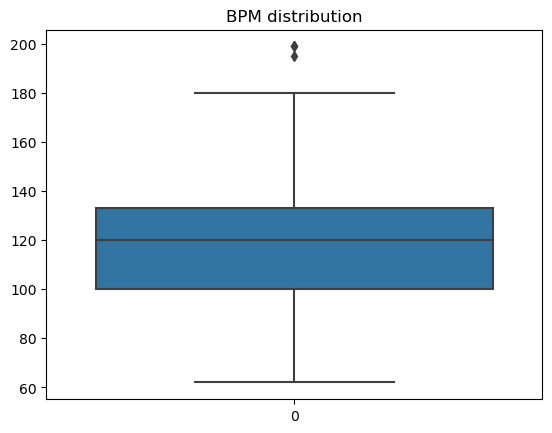

In [16]:
# plotting boxplot for bpm
sns.boxplot(data=train_data['bpm'])
plt.title('BPM distribution')
plt.show()

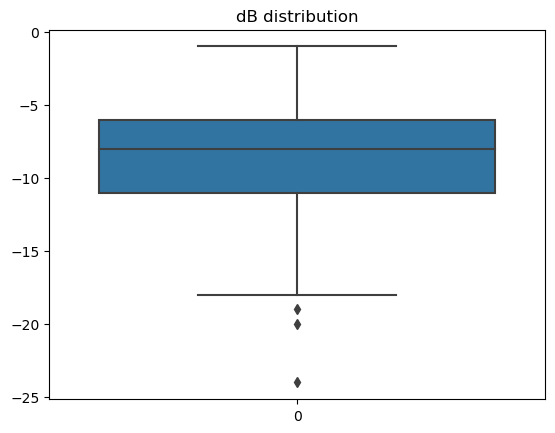

In [17]:
# plotting boxplot for dB
sns.boxplot(data=train_data['dB'])
plt.title('dB distribution')
plt.show()

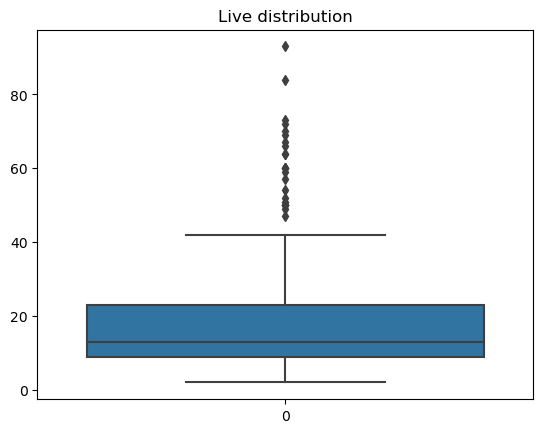

In [18]:
# plotting boxplot for live
sns.boxplot(data=train_data['live'])
plt.title('Live distribution')
plt.show()

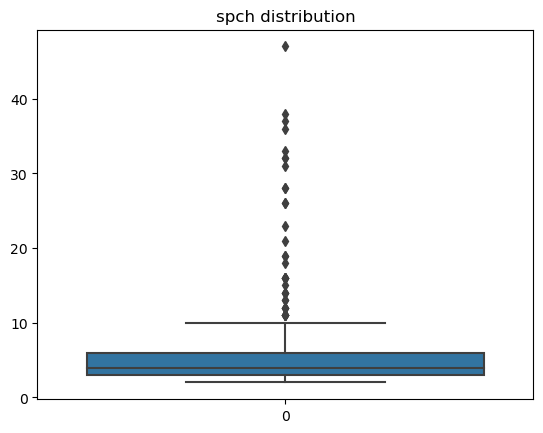

In [19]:
# plotting boxplot for spch
sns.boxplot(data=train_data['spch'])
plt.title('spch distribution')
plt.show()

In our dataset by plotting the boxplots above we were able to see that we have a few ouliers. It is important for us to remove those outliers because if we use the data with the outliers in our dataset for training the machine learning model then the model built will include those observation and result into a model which will factor in those discrepancies in data. This will make our model have a higher root mean square value. And since we desire a model with a low rmse value then we will have to remove those outliers to make our model insensitive to those outliers and give us better predictions.

In [20]:
# defining quartile ranges for our dataset
q1 = train_data.quantile(0.25)
q3 = train_data.quantile(0.75)
inter_quartile_range = q3 - q1
print(inter_quartile_range)

top genre    48.00
bpm          33.00
nrgy         34.00
dnce         20.75
dB            5.00
live         14.00
val          37.75
dur          79.50
acous        50.00
spch          3.00
pop          18.00
dtype: float64


In [21]:
# removing the ouliers
train_data = train_data[~((train_data < (q1 - 1.5 * inter_quartile_range)) |(train_data > (q3 + 1.5 * inter_quartile_range))).any(axis=1)]
train_data

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,107,31,45,-8,13,28,150,75,3,44
2,1,105,36,63,-9,13,67,245,11,3,77
3,1,170,28,47,-16,13,33,232,25,3,67
4,68,121,47,56,-8,15,40,193,45,3,63
5,80,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...
446,1,121,53,50,-8,7,61,182,76,4,45
447,25,130,66,51,-10,11,75,161,23,6,37
449,25,148,81,53,-13,23,96,147,50,3,50
451,24,165,87,64,-5,6,88,191,5,8,62


Now we will move on to making a correlation plot for our dataset. In mathematics, correlation is the measure of the degree of linear connection between two random terms. In statistics, correlation often refers to relationships between two or more random variables. The study of there correlation is important for us as it tell us about which features are more relevant in predicting our target variable.

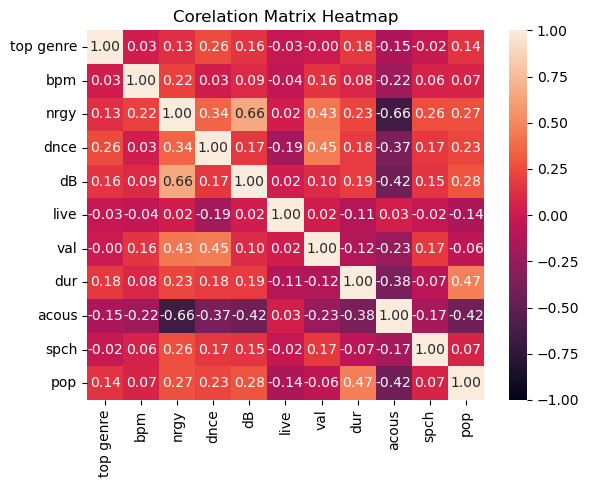

In [22]:
# making correlation matrix using heatmaps in seaborn
corr_matrix = train_data.corr()
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Corelation Matrix Heatmap')
#plt.savefig('Corelation_matrix.jpg')
plt.show()

From the above correlation plot we can see that some feature have positive correlation with our dataset while other may have neutral or negative corelation. Now it depends on us to decide which features would we want to use in making of our model. The better the features we use the better is our model going to be.

### 5. Making the Regression Models

Now we will move on to the making of our machine learning model to classify a song into its correct genre. We will first vertically divide our data set into two parts that will be our dependent variable also written as y below (also called our target variable) and our independent variable written as X below. This is done because the data of dependent variables is used to predict the class of independent variable. 

In [23]:
y = train_data['pop']
y

0      44
2      77
3      67
4      63
5      74
       ..
446    45
447    37
449    50
451    62
452    59
Name: pop, Length: 364, dtype: int64

In [24]:
X = train_data.drop(['pop'], axis = 1)
X

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,1,107,31,45,-8,13,28,150,75,3
2,1,105,36,63,-9,13,67,245,11,3
3,1,170,28,47,-16,13,33,232,25,3
4,68,121,47,56,-8,15,40,193,45,3
5,80,110,56,71,-7,12,23,223,15,6
...,...,...,...,...,...,...,...,...,...,...
446,1,121,53,50,-8,7,61,182,76,4
447,25,130,66,51,-10,11,75,161,23,6
449,25,148,81,53,-13,23,96,147,50,3
451,24,165,87,64,-5,6,88,191,5,8


Also we will dived our dataset again into two parts namely training and testing data so that we can use the training data to make the model and then use the testing data to evaluate the model that we have made. This is an important step because this is how we will select our model. The model which performs the best in accuracy will be selected as higher accuracy signifies more correctly classified target variables.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
print("Number of observations in training data: ", len(X_train))
print("Number of observations in testing data: ", len(X_test))

Number of observations in training data:  273
Number of observations in testing data:  91


We are now going to start making our models and store there accuracy and root mean squar score in a list named scores which we will later convert to a pandas dataframe to see all the metrics in a structured manner. 

In our project we have decided to make a few models using namely linear regression, support vector machine regressor, random forest, Gradient Boosting Regressor and finally Hist Gradient Boosting Regressor. All the regressors have there own set of advantages and disadvantages. Based on the data we have that is highly skewed some regressors might not work as great as other regressors but we will test all of them and give reasoning for the best and the worst models made.

In [26]:
scores = []

In [27]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = model.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)
scores.append([model, model_score, rmse])

Our model performs with the accuracy of : 36.34289691891786 %
Root mean square error: 9.234546105567711


In [29]:
model = svm.SVR()
model.fit(X_train, y_train)

SVR()

In [30]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = model.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)
scores.append([model, model_score, rmse])

Our model performs with the accuracy of : 31.755038396797776 %
Root mean square error: 9.56153051591984


In [31]:
model = RandomForestRegressor(max_depth=100, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=0)

In [32]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = model.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)
scores.append([model, model_score, rmse])

Our model performs with the accuracy of : 37.01213304054822 %
Root mean square error: 9.185875803956543


In [33]:
model = GradientBoostingRegressor(random_state = 0)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [34]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = model.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)
scores.append([model, model_score, rmse])

Our model performs with the accuracy of : 30.946974485657307 %
Root mean square error: 9.617971246574424


In [35]:
model = HistGradientBoostingRegressor(random_state = 0)
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=0)

In [36]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = model.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)
scores.append([model, model_score, rmse])

Our model performs with the accuracy of : 34.80834563732855 %
Root mean square error: 9.345189657716613


In [37]:
# making a datafram to see all model and their metrics
pd.DataFrame(scores, columns = ['Model', 'Score', 'RMSE'])

,Model,Score,RMSE
0,LinearRegression(),0.363429,9.234546
1,SVR(),0.317550,9.561531
2,"(DecisionTreeRegressor(max_depth=100, max_feat...",0.370121,9.185876
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.309470,9.617971
4,HistGradientBoostingRegressor(random_state=0),0.348083,9.345190


As we can see from the above scores data frame that the best performing model with the lowest rmse of 9.18 is our random forrest regressor. It may be because it an ensemble learning model. Using many models that have been trained on the same data and averaging their findings to provide a more accurate prediction or classification is known as ensemble learning. The assumption behind ensemble learning is that the faults of each model are distinct from one another and independent of one another. Thus after learning from all the models it gives us the best possible model.

We can also see that the worst performing model is Gradient Boosting Regressor. It could be because they are more sensitive to overfitting if the data is noisy. And our data is noisy because of the genres and other features. Gradient boosting uses ensembles to guide a single tree to the correct target since it anticipates that a single tree may frequently miss the objective. Although both are ensemble methods one performs the best while another one doesn't do much well. 

### 6. Creating the submission

In this part of the project we will now move on to importing our testing data set and using our random forrest regressor to predict the popularity of songs in testing dataset. We will then remove the columns which are not required in our submission copy and export the final submission copy to be uploaded on the kaggle competition.

In [38]:
# reading the testing dataset
test_data = pd.read_csv('CS98XRegressionTest.csv')
test_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3


In [39]:
# saving ID column to be used later
Id_col = test_data['Id']

In [40]:
# dropping the columns which are not used in making of our final model
test_data.drop(['Id', 'title', 'artist', 'year'], axis = 1, inplace=True)

In [41]:
# encoding genre to put in our final model
textual_data = ['top genre']

for col in textual_data:
    print(col, ": ", test_data[col].unique(), "\n")


top genre :  ['dance pop' 'glam rock' 'big beat' 'appalachian folk' 'adult standards'
 'mellow gold' 'album rock' 'brill building pop' 'barbadian pop'
 'british invasion' 'bubblegum dance' 'hollywood' 'cowboy western'
 'hip hop' 'g funk' 'eurodance' 'native american' 'alternative country'
 'east coast hip hop' 'art rock' 'blues rock' 'dance rock'
 'classic country pop' 'beach music' 'neo mellow' 'disco' nan 'europop'
 'classic rock' 'bronx hip hop' 'alternative metal' 'big room'
 'modern rock' 'dirty south rap' 'canadian pop' 'boy band'
 'deep adult standards' 'diva house' 'jazz fusion' 'glam metal'] 



In [42]:
# using the same encoder to transform categorical genre to numerical values
for col in textual_data:
    test_data[col] = encoder.fit_transform(test_data[col])
test_data.head()


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,20,154,93,65,-3,75,74,213,1,18
1,31,161,39,30,-15,11,14,292,26,3
2,31,64,46,27,-7,12,18,179,38,3
3,8,127,92,71,-9,37,53,216,6,4
4,4,115,46,56,-12,21,34,153,18,3


In [43]:
# creating our regressor with the best parameter as above
reg = RandomForestRegressor(max_depth=100, random_state = 0)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=0)

In [44]:
model_score = reg.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')
predicted = reg.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print("Root mean square error:",rmse)

Our model performs with the accuracy of : 37.01213304054822 %
Root mean square error: 9.185875803956543


In [45]:
# predicting the genre of songs in test data
results = reg.predict(test_data)

In [46]:
test_data['Id'] = Id_col

In [47]:
# adding predicted popularity in test data to be submitted
test_data['pop'] = results

In [48]:
submission_data = test_data.drop([ 'top genre','nrgy', 'dnce', 'dB', 'dur', 'spch', 'live', 'val', 'acous', 'bpm'], axis = 1)

In [49]:
submission_data

,Id,pop
0,454,67.00
1,455,65.69
2,456,55.85
3,457,61.08
4,458,54.96
...,...,...
109,563,64.48
110,564,63.53
111,565,60.47
112,566,63.82


In [50]:
# rounding up the values of popularity
for i in range(submission_data.shape[0]):
    submission_data['pop'][i] = round(submission_data['pop'][i], 0).astype(int) 

C:\Users\Echo\AppData\Local\Temp\ipykernel_16168\3146497583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['pop'][i] = round(submission_data['pop'][i], 0).astype(int)


In [51]:
# setting ID as index
submission_data.set_index('Id')

,pop
Id,
454,67.0
455,66.0
456,56.0
457,61.0
458,55.0
...,...
563,64.0
564,64.0
565,60.0


In [52]:
# Exporting the submission test data to a csv file to upload our results and score our methodology
submission_data.to_csv('reg_submission.csv', columns = ['Id', 'pop'], index = False)

### 7. Conclusion 

After exporting the submission data file on our kaggle competition we get a score of 8.25, which is closer to our score of 9.18 on our training data. It seems like our model is doing better in predicting the popularity in testing data taken from kaggle. It signifies that the model we have made is not overfitting on our training data. A common reason for it could be the number of observation in training data was less with very high number of classes. Thus our model seems to work well in comparision but yet in our personal opinion the methodologies used in making of the model and preparing the data for machine learning were only the best up to our particular knowledge and not the best possible solutions. In future, with no boundation of time we would to learn from our experieance and hope that better solutions could be developed with better practices involved.